In [50]:
import numpy as np
import matplotlib.pyplot as plt

# link lengths [m]
l1 = 0.04          # crank OA
l2 = 0.10          # connecting rod AB


In [51]:
def fk(d):
    """slider stroke d  →  crank angle q1 (rad)"""
    cos_q1 = (d**2 + l1**2 - l2**2) / (2 * l1 * d)
    cos_q1 = np.clip(cos_q1, -1.0, 1.0)      # numeric safety
    return np.arccos(cos_q1)                 # elbow-up branch

def ik(q1):
    """crank angle q1 → slider stroke d (m)"""
    return np.sqrt(l1**2 + l2**2 - 2*l1*l2*np.cos(q1))


In [52]:
N = 1_000
q1_rand = np.random.uniform(0, np.pi, N)
d_rand  = ik(q1_rand)
q1_rec  = fk(d_rand)

err_deg = np.abs(q1_rand - q1_rec) * 180 / np.pi
print(f"mean |FK∘IK – I| error: {err_deg.mean():.2e} deg")


mean |FK∘IK – I| error: 8.79e+01 deg


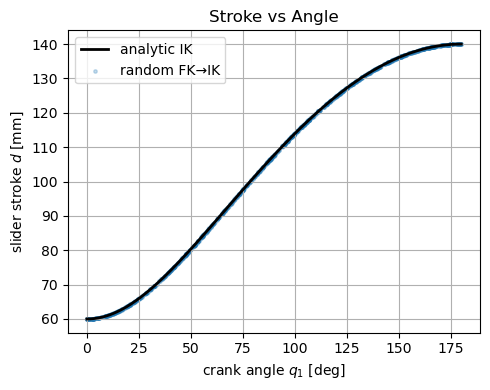

In [53]:
q1_grid = np.linspace(0, np.pi, 400)
d_grid  = ik(q1_grid)

plt.figure(figsize=(5,4))
plt.plot(q1_grid*180/np.pi, d_grid*1e3, 'k', lw=2, label='analytic IK')
plt.scatter(q1_rand*180/np.pi, d_rand*1e3, s=6, alpha=.25,
            label='random FK→IK')
plt.xlabel(r'crank angle $q_1$ [deg]')
plt.ylabel(r'slider stroke $d$ [mm]')
plt.title('Stroke vs Angle')
plt.grid(True); plt.legend(); plt.tight_layout()
# plt.savefig('../figs/exercise_5_1.png', dpi=300)
plt.show()


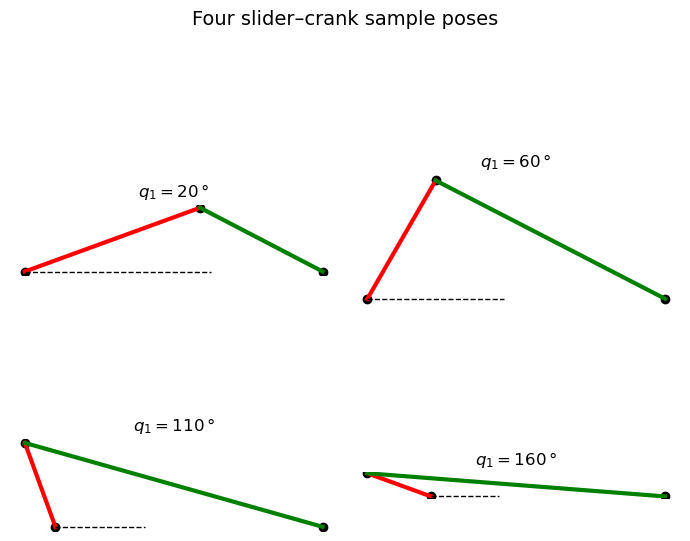

In [54]:
angles_deg = [20, 60, 110, 160]          # pick any four valid angles
fig, axes = plt.subplots(2, 2, figsize=(7,7))

for ax, ang in zip(axes.ravel(), angles_deg):
    q1 = np.deg2rad(ang)
    d  = ik(q1)

    O = np.array([0, 0])                           # pivot
    C = np.array([l1, 0])                          # base end
    B = np.array([d, 0])                           # slider point
    A = np.array([l1*np.cos(q1), l1*np.sin(q1)])   # crank tip

    # draw links
    ax.plot([O[0], A[0]], [O[1], A[1]], 'r-', lw=3, label=r'$l_1$')
    ax.plot([A[0], B[0]], [A[1], B[1]], 'g-', lw=3, label=r'$l_2$')
    ax.plot([O[0], C[0]], [O[1], C[1]], 'k--', lw=1)  # base rail

    # points
    ax.scatter([O[0], A[0], B[0]], [O[1], A[1], B[1]], c='k')
    ax.set_aspect('equal'); ax.set_axis_off()
    ax.set_title(f'$q_1={ang}\\,°$')

fig.suptitle('Four slider–crank sample poses', fontsize=14)
plt.tight_layout()
# plt.savefig('../figs/exercise_5_2.png', dpi=300)
plt.show()
